# Bagging

**Bagging (bootstrap aggregating)** ensambla $M$ modelos ajustados con diferentes versiones de los datos, obtenidas por boostraping (muestreo con reemplazamiento).

Una desventaja de bagging es que cada modelo base ve un $63\%$ de datos aproximadamente ya que, en el límite, la probabilidad de que un dato no se seleccione es:
$$p=\lim_{N\to\infty} (1-1/N)^N=e^{-1}\approx 0.37$$
No obstante, el $37\%$ de muestras **out-of-bag** puede usarse en test.

La principal ventaja de bagging es que previene que el ensamble dependa demasiado de ningún dato de entrenamiento individual, lo que favorece mayor robustez y generalización.

**Ejemplo:** bagging de árboles

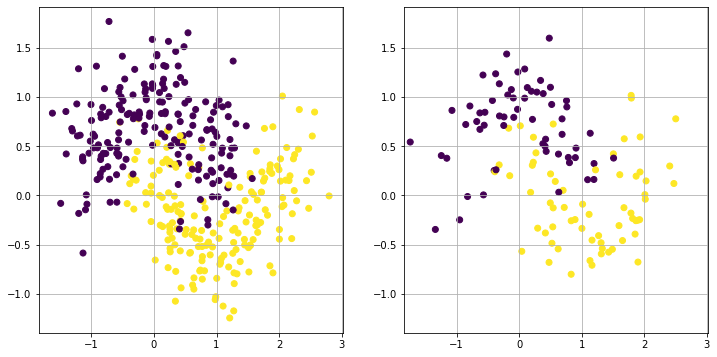

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax=axes[0]; ax.grid(); ax.scatter(*X_train.T, c=y_train)
x_min, x_max = ax.get_xlim(); y_min, y_max = ax.get_ylim()
ax=axes[1]; ax.grid(); ax.scatter(*X_test.T, c=y_test)
ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max);

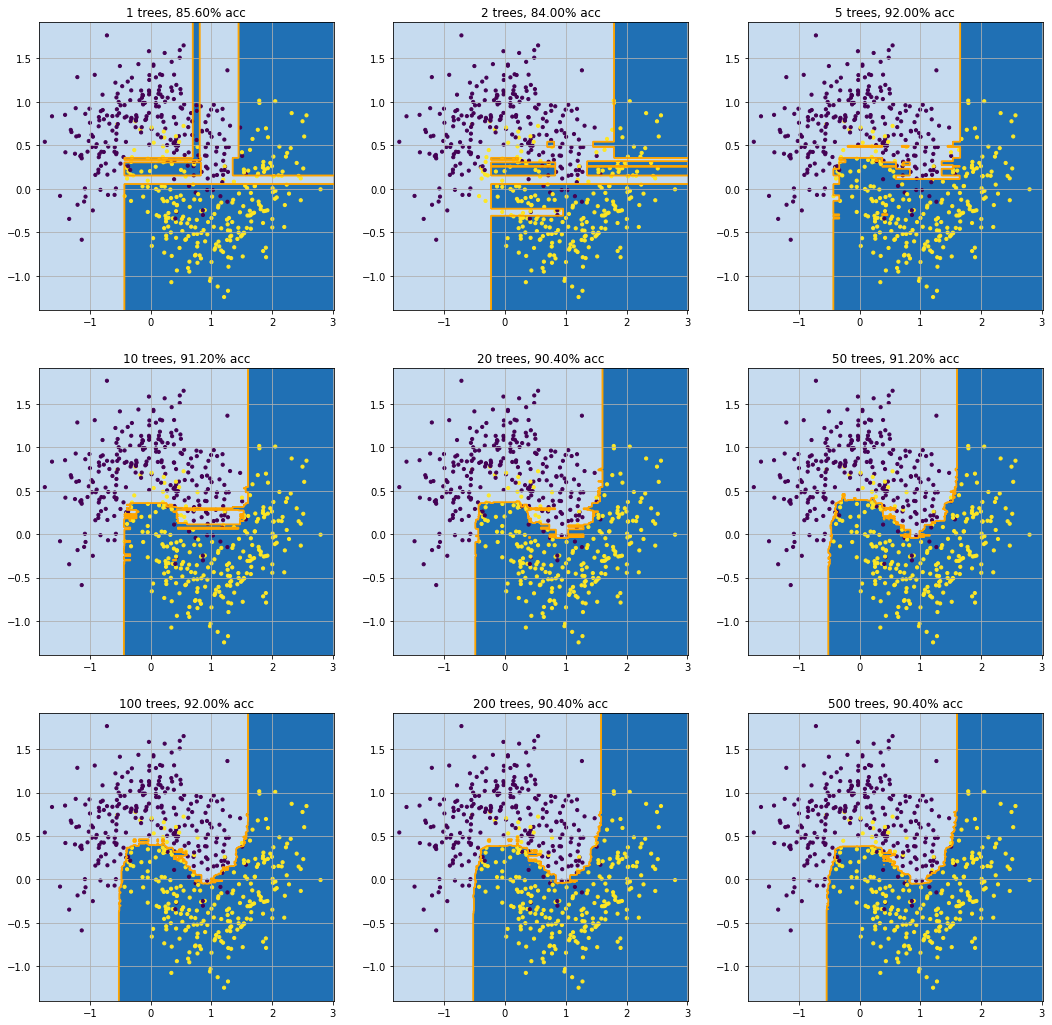

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

bag_sizes = [1, 2, 5, 10, 20, 50, 100, 200, 500]; n_bag_sizes = len(bag_sizes)
nrows = ncols = int(np.ceil(np.sqrt(n_bag_sizes)));
fig, axes = plt.subplots(nrows, ncols, figsize=(18, 18))
for i, bag_size in enumerate(bag_sizes):
    ax = axes.flat[i]
    clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=bag_size, 
        max_samples=100, bootstrap=True, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    ax.grid(); ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max);
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=1000), np.linspace(y_min, y_max, num=1000))
    zz = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ax.contour(xx, yy, zz.reshape(xx.shape), 1, colors='orange', linestyles='solid')
    ax.contourf(xx, yy, zz.reshape(xx.shape), 1, cmap='Blues'); ax.scatter(*X.T, c=y, s=10)
    ax.set_title('{} trees, {:.2%} acc'.format(bag_size, acc))

**Ejemplo:** clasificación de correos en spam y no-spam

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("https://github.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/blob/master/data/Spam.txt?raw=True")
is_test = df.test.values; y = df.spam.values; X = df.drop(['test','spam'], axis=1).to_numpy(copy=True)
X_train, X_test = X[is_test == 0], X[is_test == 1]
y_train, y_test = y[is_test == 0], y[is_test == 1]
ntrees_list = [10, 50, 100, 200, 300, 400, 500]
for ntrees in ntrees_list:
    clf = BaggingClassifier(n_estimators=ntrees, random_state=10, bootstrap=True).fit(X_train, y_train)
    y_test_hat = clf.predict(X_test)
    acc = accuracy_score(y_test, y_test_hat)
    print(f'Bagged {ntrees} trees, test err {1 - acc:.1%}')

Bagged 10 trees, test err 5.9%
Bagged 50 trees, test err 5.5%
Bagged 100 trees, test err 5.4%
Bagged 200 trees, test err 5.5%
Bagged 300 trees, test err 5.5%
Bagged 400 trees, test err 5.4%
Bagged 500 trees, test err 5.6%
